# Author: Shyam Vishnu

# Importing Neccessary Packages

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE

# Create dataset

# Data Gathering, Visualization, Data types and formatting

In [82]:
# Read data
df = pd.read_csv('eda.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [83]:
# Shape of Data frame
print(df.shape)

# Columns in data frame
print(df.columns)

# General information about data frame
print(df.info())

(48895, 16)
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude    

In [84]:
#Data types
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [85]:
#Describe data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [86]:
#Describe categorical data
df.describe(include=['object', 'bool'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [87]:
#Duplicates



In [88]:
#Value counts
#For categorical (type object) and boolean (type bool) features we can use the value_counts method
df['name'].value_counts()

# you can see other columns as well
df['id'].value_counts()

# To calculate fractions
df['name'].value_counts(normalize=True)

Hillside Hotel                                        0.000368
Home away from home                                   0.000348
New york Multi-unit building                          0.000327
Brooklyn Apartment                                    0.000246
Private Room                                          0.000225
                                                        ...   
Spacious rm 15 mins from downtown!                    0.000020
❤️ Beautiful/Spacious/Convenient BK Apartment!        0.000020
HUGE STUDIO-Cozy,Centrally Located!                   0.000020
Romantic space at the Upper East side of Manhattan    0.000020
Brooklyn Room - 20 min from Manhattan                 0.000020
Name: name, Length: 47905, dtype: float64

In [89]:
# Summary Tables
# Getting a cross tab of items
pd.crosstab(df['neighbourhood_group'], df['room_type'])

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [90]:
# Getting a cross tab of items in percentage share
pd.crosstab(df['neighbourhood_group'], df['room_type'], normalize = True)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,0.007751,0.013335,0.001227
Brooklyn,0.195501,0.207220,0.008447
Manhattan,0.269946,0.163248,0.009817
Queens,0.042867,0.068964,0.004049
Staten Island,0.003600,0.003845,0.000184


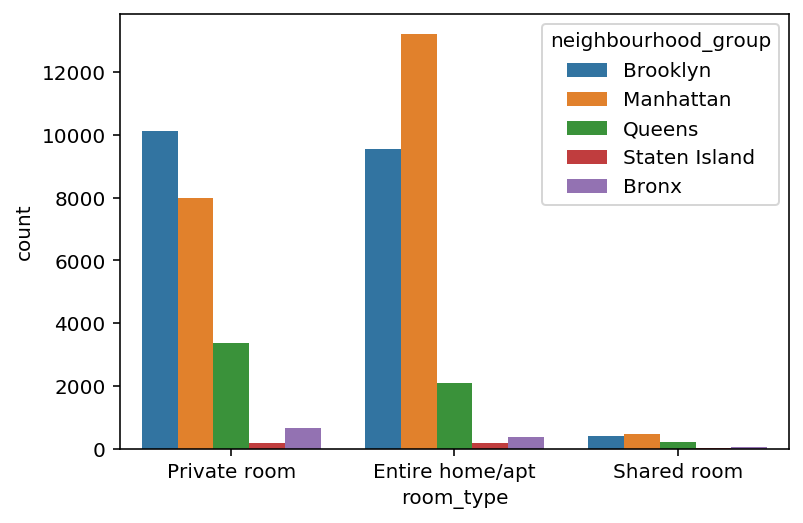

In [91]:
#Visualize data spread
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

sns.countplot(x='room_type', hue='neighbourhood_group', data=df);

# Create new variable if neccessary

# Drop variables that are not useful for prediction

In [92]:
df = df.drop(['name','host_name','host_id','id','last_review','reviews_per_month','neighbourhood' ,'latitude','longitude'], axis =1 )

# Converting remaining useful categorical variables to dummy variables

In [93]:
#Select all categorical variables
df.select_dtypes(include=['bool','object','category'])

df = pd.get_dummies(df , drop_first= True)
df


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,149,1,9,6,365,1,0,0,0,1,0
1,225,1,45,2,355,0,1,0,0,0,0
2,150,3,0,1,365,0,1,0,0,1,0
3,89,1,270,1,194,1,0,0,0,0,0
4,80,10,9,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,70,2,0,2,9,1,0,0,0,1,0
48891,40,4,0,2,36,1,0,0,0,1,0
48892,115,10,0,1,27,0,1,0,0,0,0
48893,55,1,0,6,2,0,1,0,0,0,1


# Data splitting into x train and y train 

In [94]:
y = df['price'] # y_variable
x = df.drop(['price'],axis =1) #y_variable
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Missing data handling


In [95]:
# Count number of nulls
print(X_train.isna().sum())
print(X_test.isna().sum())
print(Y_train.isna().sum())
print(Y_test.isna().sum())

# Drop any y_train and y_test = NA



minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Private room               0
room_type_Shared room                0
dtype: int64
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Private room               0
room_type_Shared room                0
dtype: int64
0
0


In [96]:
# Case deletion

#X_train = X_train.dropna()
#X_test = X_test.dropna()

### Outlier handling

In [97]:
Y_test

43813    225
32734    649
25276    300
36084     26
17736    125
        ... 
8380     150
44518    100
25614    150
13590    149
22995    169
Name: price, Length: 9779, dtype: int64

### Sampling (using SMOTE)

In [110]:
# transform the dataset
#SMOTE works with numeric variables only
# Not a classification problem
oversample = SMOTE(k_neighbors= 2)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 3

### Normalization / Standarization

In [107]:
# Normalization

In [106]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

# Feature Selection

### Using Correlation and heatmap generation

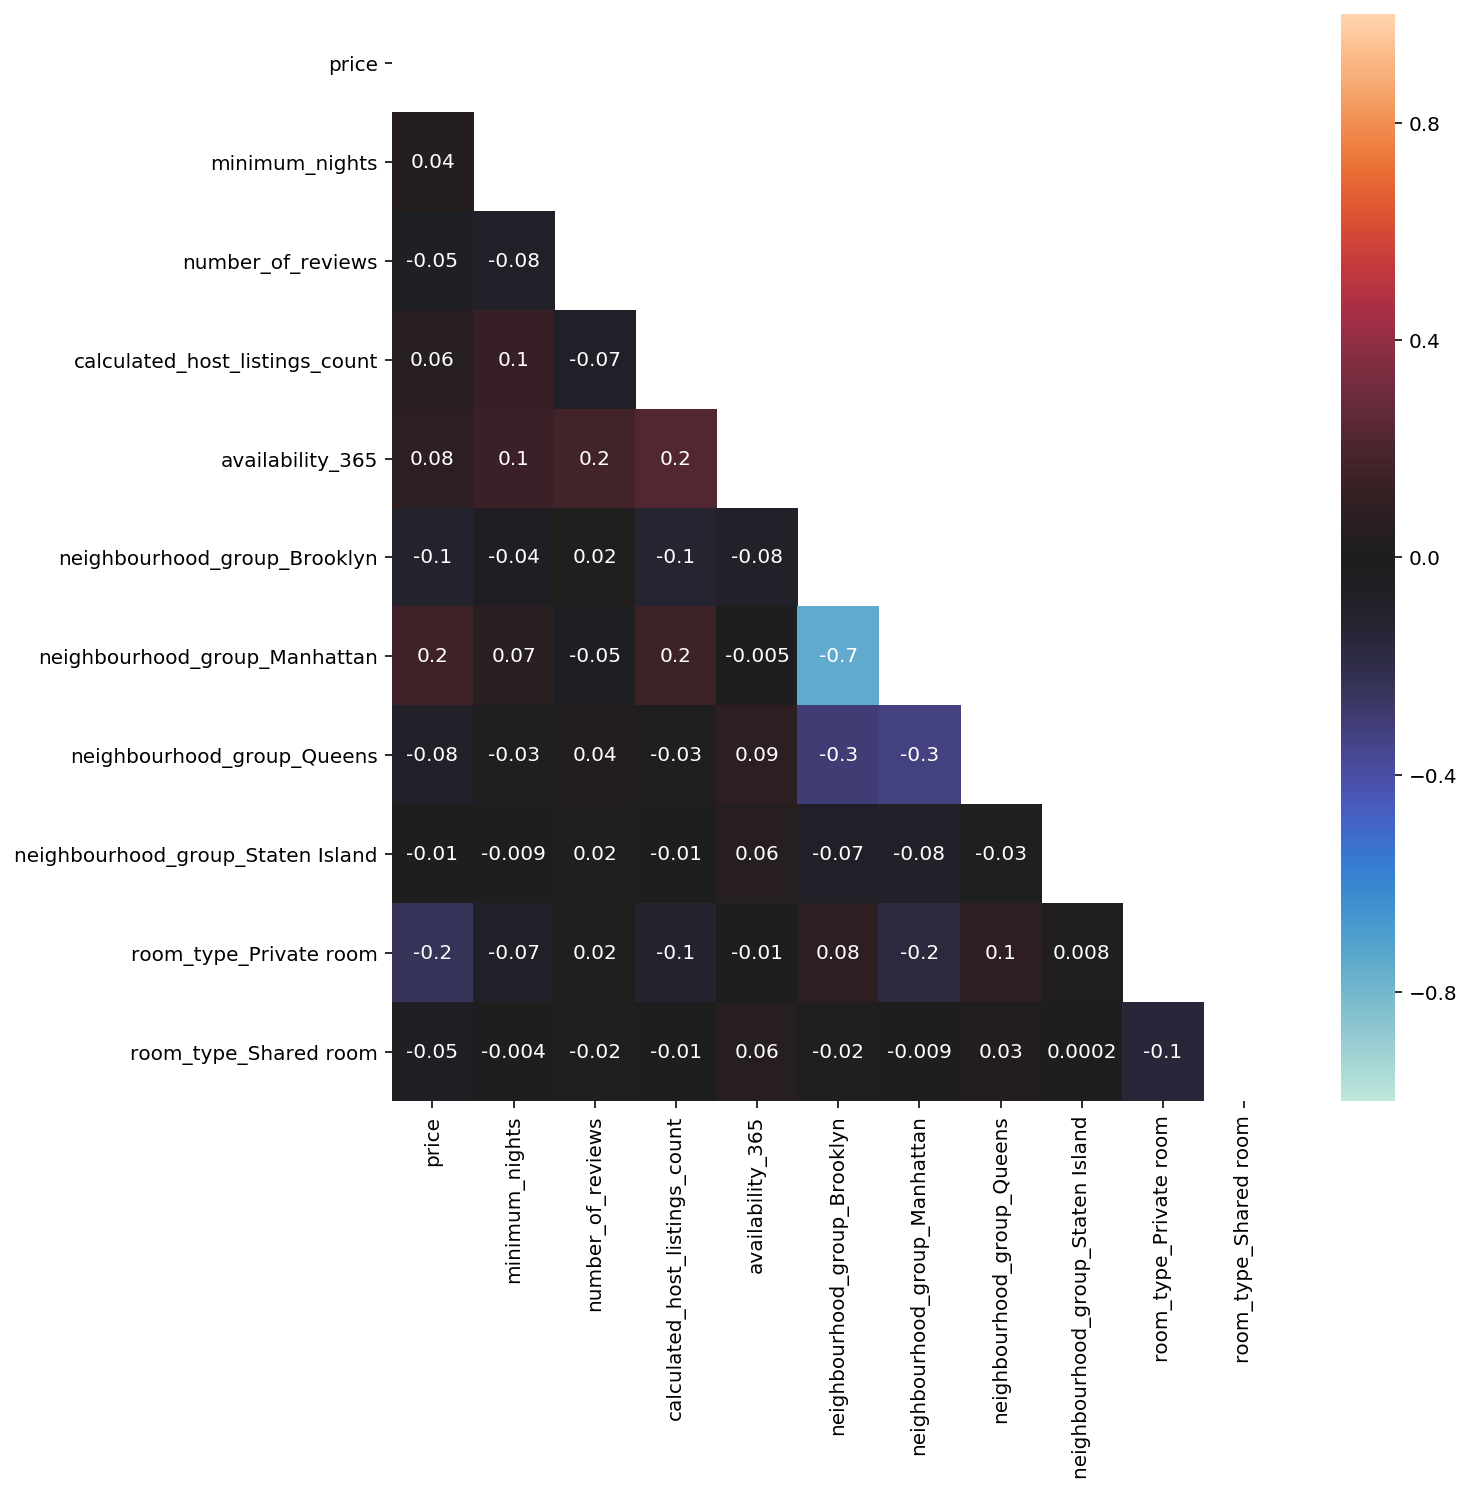

In [143]:
#Heatmap
corr = df.corr()
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True , fmt='.1g', vmin=-1, vmax=1, center= 0,mask = matrix)
plt.show()

In [145]:
# Another Style
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
price,1.000000,0.042799,-0.047954,0.057472,0.081829,-0.098603,0.163976,-0.080205,-0.013840,-0.240246,-0.053613
minimum_nights,0.042799,1.000000,-0.080116,0.127960,0.144303,-0.039658,0.067362,-0.032629,-0.009400,-0.073837,-0.004218
number_of_reviews,-0.047954,-0.080116,1.000000,-0.072376,0.172028,0.017414,-0.045820,0.035967,0.015088,0.017253,-0.023355
calculated_host_listings_count,0.057472,0.127960,-0.072376,1.000000,0.225701,-0.123234,0.152842,-0.033881,-0.012838,-0.108945,-0.011737
availability_365,0.081829,0.144303,0.172028,0.225701,1.000000,-0.079671,-0.005434,0.087113,0.057885,-0.010986,0.058294
neighbourhood_group_Brooklyn,-0.098603,-0.039658,0.017414,-0.123234,-0.079671,1.000000,-0.745240,-0.302527,-0.073265,0.079464,-0.017467
neighbourhood_group_Manhattan,0.163976,0.067362,-0.045820,0.152842,-0.005434,-0.745240,1.000000,-0.322875,-0.078193,-0.157762,-0.009169
neighbourhood_group_Queens,-0.080205,-0.032629,0.035967,-0.033881,0.087113,-0.302527,-0.322875,1.000000,-0.031742,0.100676,0.026693
neighbourhood_group_Staten Island,-0.013840,-0.009400,0.015088,-0.012838,0.057885,-0.073265,-0.078193,-0.031742,1.000000,0.008345,0.000233
room_type_Private room,-0.240246,-0.073837,0.017253,-0.108945,-0.010986,0.079464,-0.157762,0.100676,0.008345,1.000000,-0.142899


### Wrapping Methods (Sequential feature selector) !



In [162]:
# Foward selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=1,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [163]:
sfs.fit(X_train, Y_train)
sfs.k_feature_names_  

('room_type_Private room',)

In [165]:
# Backward selection
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=6,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X_train, Y_train)
sbs.k_feature_names_

('number_of_reviews',
 'availability_365',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'room_type_Private room',
 'room_type_Shared room')

In [174]:
#Both
sfs1 = SFS(LinearRegression(),
         k_features=(3,9),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X_train, Y_train)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(3, 9))

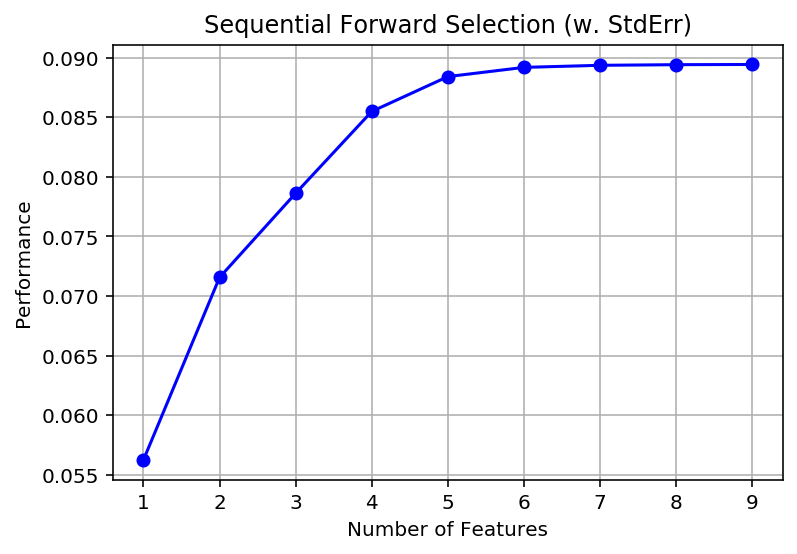

In [205]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

5 is the optimum number of features!

In [200]:
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X_train, Y_train)
sfs.k_feature_names_  


('number_of_reviews',
 'availability_365',
 'neighbourhood_group_Manhattan',
 'room_type_Private room',
 'room_type_Shared room')

In [ ]:
# Extra tree classifier

Reduce X train, Y train, X test, Y test to number the optimal features!

# Model with selected features

### Linear Regression

In [211]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

def evaluate_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    #diff = scores.mean() - model.score(X_test, y_test)
    #SD = diff / scores.std()
    print(preds)
    #print(f"Training Score:{model.score(X_train, y_train)}")
    #print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    #print(f"Testing Score: {model.score(X_test, y_test)}")
    #print(f"Cross & Test Diff: {diff}")
    #print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(Y_test, preds))

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
lr = LinearRegression()

evaluate_model(X_train, Y_train, lr)

[[234.57216428]
 [239.00832784]
 [176.85405866]
 ...
 [ 61.94238339]
 [ 64.51007513]
 [172.43870781]]


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

### Classification Model

Logistic Regression

XGBoosting

Random forest

### Clustering model

Kmeans

DBSCSAN

# Hyperparameter Optimaztion

# Model results

In [206]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,preds)


NameError: name 'preds' is not defined

In [ ]:
# ROC / AUC

In [3]:
# Costs involved

In [ ]:
# Visualize model results